In [67]:
import pandas as pd
import numpy as np 
import re

a = np.load('/N/u2/d/dnperera/git/pipedream/runtime/image_classification/logs/32_resnet101_4_straight_mp_conf/32_0.pickle.npy')
a = np.load('/N/u2/d/dnperera/git/pipedream/runtime/image_classification/logs/32_resnet101_4_straight_mp_conf/32_0.pickle.npy')

print([x for x in a[0,0]])


[1591912100.2144973, 1591912100.3276196, 1591912100.3577108, 1591912100.357817, 1591912100.4271631, 1591912113.9221025, 1591912115.9076312, 1591912115.9076483, 1591912115.9133313, 1591912115.921368]


In [194]:
file = '/N/u2/d/dnperera/victor/git/twisterx/cpp/src/examples/utils/out.log'

rows = []
build_ph = []
probe_ph = []
index = []
build = []
join = []
tuples = []
lsort=[]
rsort=[]

types=['R', 'L', 'I', 'O']
algos=['H', 'S']
repititions=10

with open(file, 'r') as fp: 
        lines = fp.readlines() 
                
        for l in lines:
            splits = re.findall("\d+", l)
            if '/tmp/csv1.csv' in l:  # todo this might not work now
                rows.append(int(splits[1]))
            if 'build_phase' in l:
                build_ph.append(int(splits[7]))
            if 'probe_phase' in l:
                probe_ph.append(int(splits[7]))
            if 'Index join time' in l:
                index.append(int(splits[7]))
            if 'Building final table with number of tuples' in l:
                tuples.append(int(splits[7]))
            if 'Built final table in' in l:
                build.append(int(splits[7]))
            if 'join_ms' in l:
                join.append(int(splits[7]))
            if 'Left sorting time' in l:
                lsort.append(int(splits[7]))
            if 'right sorting time ' in l:
                rsort.append(int(splits[7]))
        
        
            

In [125]:
k = build[2*4*10*5:2*4*10*6]
b = 0
for i in range(repititions):
    b += k[i*8]
b/repititions

7604.3

In [35]:
l = "generate csv : {'output': '/tmp/csv1.csv', 'rows': 10000, 'cols': 4, 'idx_cols': [0], 'krange': [0, 1000], 'vrange': (0.0, 1.0), 'no_header': False}"
re.split(', | ',l)[6]

'10000'

In [195]:
types=['R', 'L', 'I', 'O']
algos=['H', 'S']
cols = ['rows', 'type', 'algo', 'join_t', 'build_t', 'index_t', 'build_ph', 'probe_ph', 'lsort', 'rsort', 'tuples']

data = []

datapoints_per_iter = len(types) * len(algos) 

assert len(join) == datapoints_per_iter * len(rows) * repititions

for i in range(len(join)):
    r = rows[int(i/(datapoints_per_iter * repititions))]
    t = types[int(i/2)%4]
    a = algos[i%2]
    
    bp = build_ph[int(i/2)] if a is 'H' else 0
    pp = probe_ph[int(i/2)] if a is 'H' else 0

    ls = lsort[int(i/2)] if a is 'S' else 0
    rs = rsort[int(i/2)] if a is 'S' else 0
    
    j = join[i]
    b = build[i]
    idx = index[i]
    tup = tuples[i]
    
#     it = i /(len(types) * )

    data.append([r, t, a, j, b, idx, bp, pp, ls, rs, tup])

df_o = pd.DataFrame(data, columns=cols)
df = df_o.groupby(['rows', 'type', 'algo']).mean()
df

join_t   build_t   index_t  build_ph  probe_ph  \
rows      type algo                                                     
100000    I    H         18.4       3.5      14.2       5.0       5.0   
               S         27.6       5.2       7.6       0.0       0.0   
          L    H         22.3       7.0      15.0       5.0       5.8   
               S         30.4       8.4       7.5       0.0       0.0   
          O    H         38.4       8.0      30.2      11.0      14.1   
...                       ...       ...       ...       ...       ...   
500000000 L    S     577646.6  141062.3  120912.3       0.0       0.0   
          O    H     895380.2  224648.2  658077.3  231619.9  365344.0   
               S     641809.2  203319.4  122867.0       0.0       0.0   
          R    H     476192.6  137866.5  325364.0  123435.2  156188.1   
               S     584259.5  142579.8  126568.8       0.0       0.0   

                        lsort     rsort       tuples  
rows      type algo                                   
100000    I    H          0.0       0.0     101076.0  
               S          6.4       6.6     101076.0  
          L    H          0.0       0.0     137513.0  
               S          6.5       6.4     137513.0  
          O    H          0.0       0.0     173787.0  
...                       ...       ...          ...  
500000000 L    S     180472.1  121898.5  687168578.0  
          O    H          0.0       0.0  869237779.0  
               S     180040.2  121961.2  869237779.0  
          R    H          0.0       0.0  687141884.0  
               S     179865.0  121897.9  687141884.0  

[96 rows x 8 columns]

In [189]:
df_o


,rows,type,algo,join_t,build_t,index_t,build_ph,probe_ph,lsort,rsort,tuples
0,100000,R,H,24,8,16,5,6,0,0,137339
1,100000,R,S,32,9,8,0,0,7,7,137339
2,100000,L,H,24,8,15,5,6,0,0,137536
3,100000,L,S,32,9,8,0,0,7,7,137536
4,100000,I,H,20,5,15,5,5,0,0,101022
...,...,...,...,...,...,...,...,...,...,...,...
955,500000000,L,S,31800,6340,9710,0,0,7063,8684,38772763
956,500000000,I,H,21931,3588,18341,9021,6835,0,0,3018272
957,500000000,I,S,25424,926,8750,0,0,7050,8695,3018272
958,500000000,O,H,49114,12604,36507,16189,15340,0,0,74526868


In [196]:
tb = df.pivot_table(index= ['type','rows'], columns = ['algo'], values = ['join_t', 'build_t', 'index_t', 'tuples'])
tb

build_t             index_t              join_t            \
algo                   H         S         H         S         H         S   
type rows                                                                    
I    100000          3.5       5.2      14.2       7.6      18.4      27.6   
     250000         16.0      22.8      45.8      21.6      62.3      84.5   
     500000         29.1      49.5      90.6      45.7     120.4     177.8   
     750000         51.3      76.3     153.3      70.8     205.1     275.5   
     1000000        65.1      96.0     225.4     104.2     291.1     382.3   
     10000000     1725.9    1720.0    4202.5    1846.3    5929.5    6316.4   
     25000000     4729.9    4485.6   11214.8    4812.6   15946.1   17590.3   
     50000000     9677.5    9716.6   22829.2   10124.2   33662.5   40653.7   
     75000000    14713.3   13965.4   34621.6   15981.6   51090.1   65081.5   
     100000000   19828.3   18774.8   46892.0   21494.4   69120.1   89793.2   
     250000000   51625.8   47301.7  127781.9   58046.0  185571.3  245597.6   
     500000000  114395.3  102038.5  299959.7  121809.6  427557.0  538519.5   
L    100000          7.0       8.4      15.0       7.5      22.3      30.4   
     250000         23.0      29.9      46.9      22.7      70.1      92.8   
     500000         42.8      59.2      95.0      51.1     138.3     192.8   
     750000         70.2      98.9     158.6      77.5     229.1     304.5   
     1000000        89.4     131.4     231.0     112.8     320.9     426.4   
     10000000     2073.2    2328.3    4371.8    1880.5    6446.0    6959.1   
     25000000     5557.7    6029.0   11660.8    4848.8   17220.3   19199.6   
     50000000    11416.5   13044.2   23800.6   10400.1   36411.7   44901.1   
     75000000    17336.9   18788.3   36220.9   16317.5   55318.1   70283.7   
     100000000   23256.6   25193.5   48813.6   21807.6   74522.5   96568.7   
     250000000   60577.4   63519.9  133837.0   57061.3  200659.7  260934.4   
     500000000  141144.5  141062.3  323765.9  120912.3  477667.3  577646.6   
O    100000          8.0      11.0      30.2       8.0      38.4      33.3   
     250000         25.9      36.8      92.4      23.5     118.7     101.0   
     500000         52.6      79.2     201.9      54.8     255.0     216.7   
     750000         86.0     121.9     389.6      82.3     476.1     332.3   
     1000000       116.7     168.4     593.8     122.1     711.0     474.1   
     10000000     2866.4    2900.3    8728.7    1930.3   11596.2    7587.6   
     25000000     7726.5    7593.5   22591.7    4977.3   30320.3   20866.2   
     50000000    15895.6   18311.0   46380.0   10927.3   63308.6   51658.4   
     75000000    23529.1   25840.8   69492.3   16441.8   94774.9   77687.0   
     100000000   32775.6   34819.6   95586.7   21837.6  130764.2  106356.8   
     250000000   91528.8   89116.2  277156.9   57611.7  374800.8  287826.8   
     500000000  224648.2  203319.4  658077.3  122867.0  895380.2  641809.2   
R    100000          7.6       8.3      16.2       8.5      24.6      31.8   
     250000         22.1      28.9      42.6      22.2      65.0      91.4   
     500000         48.4      59.9      95.4      52.9     144.5     195.5   
     750000         74.1      99.0     156.7      77.5     231.4     304.9   
     1000000        98.5     137.1     242.8     115.2     342.1     434.5   
     10000000     2025.6    2305.7    4465.7    1874.4    6492.5    6932.2   
     25000000     5600.1    6049.3   11859.0    4881.7   17461.1   19227.5   
     50000000    11917.0   12900.7   23962.6   10492.9   36972.8   45240.5   
     75000000    17354.3   18722.3   36425.0   16024.1   55531.0   69937.9   
     100000000   23235.1   25124.7   48527.3   21424.5   74187.5   95991.5   
     250000000   60438.0   63007.1  133617.7   57641.0  200369.8  261063.9   
     500000000  137866.5  142579.8  325364.0  126568.8  476192.6  584259.5   

                     tuples           

algo type       rows         H         S
0       R     100000      24.6      31.8
1       R     250000      65.0      91.4
2       R     500000     144.5     195.5
3       R     750000     231.4     304.9
4       R    1000000     342.1     434.5
5       R   10000000    6492.5    6932.2
6       R   25000000   17461.1   19227.5
7       R   50000000   36972.8   45240.5
8       R   75000000   55531.0   69937.9
9       R  100000000   74187.5   95991.5
10      R  250000000  200369.8  261063.9
11      R  500000000  476192.6  584259.5


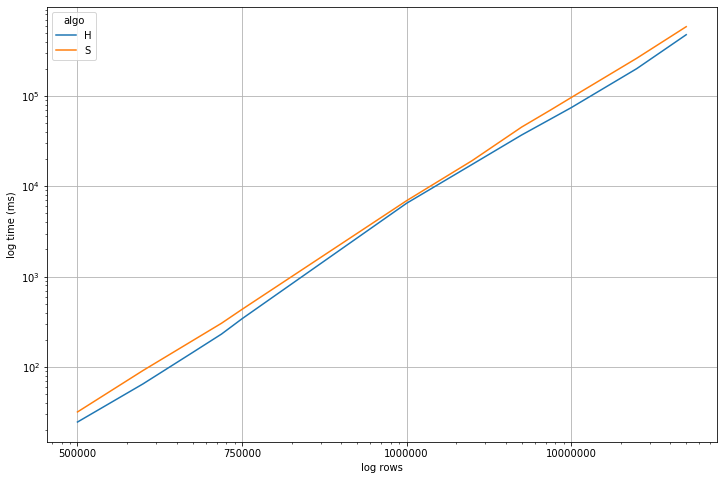

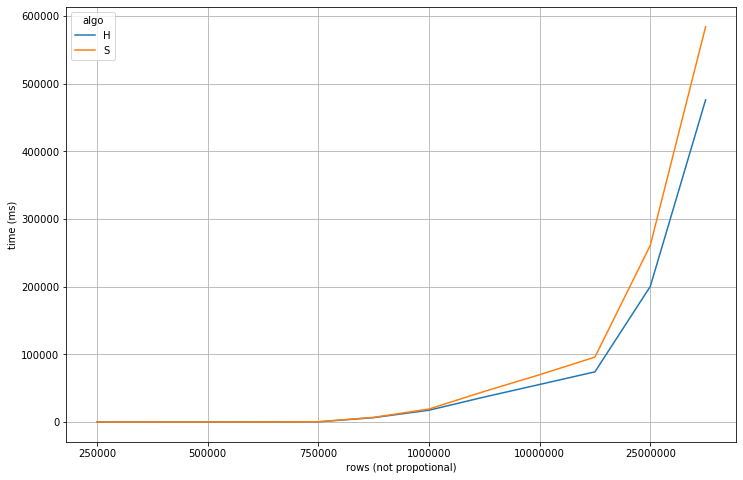

In [197]:
import matplotlib

df2 = tb[tb.index.isin(['R'], level=0)]['join_t'].reset_index()
# df2 = tb[tb.index.isin(['R'], level=0)]['join_t']
print(df2)
ax = df2.plot(y=['H', 'S'], x= 'rows', loglog=True, figsize=(12,8))
ax.set_xticklabels(df2['rows'])
ax.set_xlabel('log rows')
ax.set_ylabel('log time (ms)')
ax.grid(True, axis='both')
fig = ax.get_figure()
fig.savefig('st_join_lg.png')

ax = df2.plot(y=['H', 'S'], figsize=(12,8))
ax.set_xticklabels(df2['rows'])
ax.set_xlabel('rows (not propotional)')
ax.set_ylabel('time (ms)')
ax.grid(True, axis='both')
fig = ax.get_figure()
fig.savefig('st_join.png')

algo type       rows            H            S
0       R     100000     137350.0     137350.0
1       R     250000     343216.0     343216.0
2       R     500000     687864.0     687864.0
3       R     750000    1030305.0    1030305.0
4       R    1000000    1374517.0    1374517.0
5       R   10000000   13742736.0   13742736.0
6       R   25000000   34362430.0   34362430.0
7       R   50000000   68705383.0   68705383.0
8       R   75000000  103059181.0  103059181.0
9       R  100000000  137424925.0  137424925.0
10      R  250000000  343552521.0  343552521.0
11      R  500000000  687141884.0  687141884.0


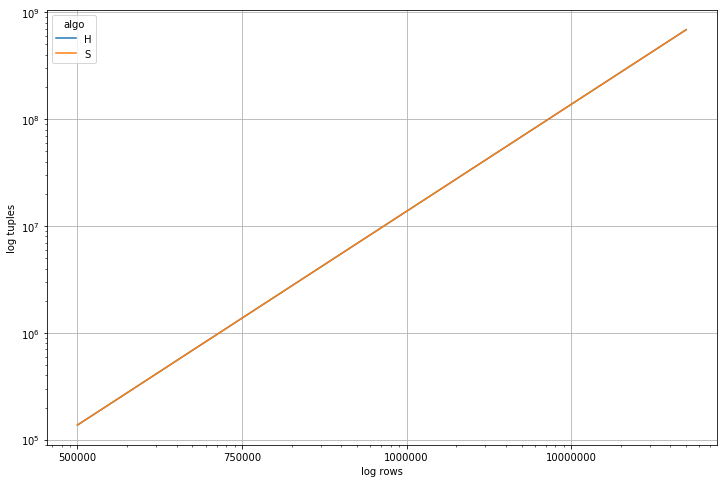

In [198]:
df2 = tb[tb.index.isin(['R'], level=0)]['tuples'].reset_index()
# df2 = tb[tb.index.isin(['R'], level=0)]['join_t']
print(df2)
ax = df2.plot(y=['H', 'S'], x= 'rows', loglog=True, figsize=(12,8))
ax.set_xticklabels(df2['rows'])
ax.set_xlabel('log rows')
ax.set_ylabel('log tuples')
ax.grid(True, axis='both')
fig = ax.get_figure()
# fig.savefig('st_join_lg.png')

In [ ]:
file = '/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/out-dist.log'

rows = []
build_ph = []
probe_ph = []
index = []
build = []
join = []
tuples = []
lsort=[]
rsort=[]

types=['R', 'L', 'I', 'O']
algos=['H', 'S']
repititions=10

with open(file, 'r') as fp: 
        lines = fp.readlines() 
                
        for l in lines:
            splits = re.findall("\d+", l)
            if '/tmp/csv1.csv' in l:
                rows.append(int(splits[1]))
            if 'build_phase' in l:
                build_ph.append(int(splits[7]))
            if 'probe_phase' in l:
                probe_ph.append(int(splits[7]))
            if 'Index join time' in l:
                index.append(int(splits[7]))
            if 'Building final table with number of tuples' in l:
                tuples.append(int(splits[7]))
            if 'Built final table in' in l:
                build.append(int(splits[7]))
            if 'join_ms' in l:
                join.append(int(splits[7]))
            if 'Left sorting time' in l:
                lsort.append(int(splits[7]))
            if 'right sorting time ' in l:
                rsort.append(int(splits[7]))

types=['R', 'L', 'I', 'O']
algos=['H', 'S']
cols = ['rows', 'type', 'algo', 'join_t', 'build_t', 'index_t', 'build_ph', 'probe_ph', 'lsort', 'rsort', 'tuples']

data = []

datapoints_per_iter = len(types) * len(algos) 

assert len(join) == datapoints_per_iter * len(rows) * repititions

for i in range(len(join)):
    r = rows[int(i/(datapoints_per_iter * repititions))]
    t = types[int(i/2)%4]
    a = algos[i%2]
    
    bp = build_ph[int(i/2)] if a is 'H' else 0
    pp = probe_ph[int(i/2)] if a is 'H' else 0

    ls = lsort[int(i/2)] if a is 'S' else 0
    rs = rsort[int(i/2)] if a is 'S' else 0
    
    j = join[i]
    b = build[i]
    idx = index[i]
    tup = tuples[i]
    
#     it = i /(len(types) * )

    data.append([r, t, a, j, b, idx, bp, pp, ls, rs, tup])

df_o = pd.DataFrame(data, columns=cols)
df = df_o.groupby(['rows', 'type', 'algo']).mean()
df
        

In [125]:
import re 
import pandas as pd

row_cases = [int(ii * 1000000) for ii in [0.125, 0.25, 0.5, 1, 2]]
world_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 160]
repetitions = 4
types=['I', 'L', 'R', 'O'] # from the JC config enums 
algos=['S','H'] # JC enums 

data = []
cols = ['rows', 'world', 'type', 'algo', 'rank','join_t', 'wait_t', 'total_t', 'lines']

for i, rows in enumerate(row_cases):
    for w, world in enumerate(world_sizes):
        
        for r in range(repetitions):
            file = f"/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx{i*len(world_sizes)*repetitions + w*repetitions + r + 1:02d}"
            print('reading', file, i, w, r)
            
            proc_map = {}
            
            with open(file, 'r') as fp: 
                lines = fp.readlines() 

                for l in lines:
                    s = [int(k) for k in re.findall("\d+", l)]
                    if i == 0 and w == 0 and '##### repetitions for each test' in l:
                        assert repetitions == s[0]
#                     if 'starting!' in l:
#                         assert rows == s[0] 
#                         assert world == s[1]
                    if 'table_join_dist_test.cpp:84' in l: # I0619 00:00:12.017522 58265 table_join_dist_test.cpp:82] 1 Reading tables
                        pid = s[5]
                        proc_map[pid] = s[-1]
#                         print(f"proc {pid} == {s[-1]}")
                    if 'table_join_dist_test.cpp:50' in l: #I0619 12:14:32.356401 68448 table_join_dist_test.cpp:49] 63 j_t 586 w_t 0 lines 174394 t 3 a0
                        pid = s[5]
                        rank = s[7]
                        assert proc_map[pid] == rank
                        d = [rows, world, types[s[11]], algos[s[12]], rank, s[8], s[9], s[8] + s[9], s[10]]
                        data.append(d)
        
print('total lines', len(data))        
assert len(data) == len(row_cases)*sum(world_sizes)*repetitions * len(types) * len(algos)



reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx01 0 0 0
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx02 0 0 1
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx03 0 0 2
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx04 0 0 3
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx05 0 1 0
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx06 0 1 1
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx07 0 1 2
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx08 0 1 3
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx09 0 2 0
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx10 0 2 1
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx11 0 2 2
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx12 0 2 3
reading /N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/xx13 0 3 0
reading /N/u

In [126]:
df_o = pd.DataFrame(data, columns=cols)
df = df_o.groupby(['rows', 'world', 'type', 'algo', 'rank']).mean()
df

join_t  wait_t  total_t      lines
rows    world type algo rank                                     
125000  1     I    H    0       67.00    0.00    67.00   125813.0
                   S    0       81.50    0.00    81.50   125813.0
              L    H    0       72.75    0.00    72.75   171228.0
                   S    0       85.75    0.00    85.75   171228.0
              O    H    0       95.00    0.00    95.00   217093.0
...                               ...     ...      ...        ...
2000000 160   R    S    155   3285.75   57.25  3343.00  4037440.0
                        156   3295.75   44.50  3340.25  4299680.0
                        157   3248.50   92.75  3341.25  3992640.0
                        158   3215.25  126.25  3341.50  3701920.0
                        159   3281.50   59.75  3341.25  4178880.0

[16600 rows x 4 columns]

In [127]:
dd = df.reset_index()
dd
dd[(dd['rank']==0)]

,rows,world,type,algo,rank,join_t,wait_t,total_t,lines
0,125000,1,I,H,0,67.00,0.00,67.00,125813.0
1,125000,1,I,S,0,81.50,0.00,81.50,125813.0
2,125000,1,L,H,0,72.75,0.00,72.75,171228.0
3,125000,1,L,S,0,85.75,0.00,85.75,171228.0
4,125000,1,O,H,0,95.00,0.00,95.00,217093.0
...,...,...,...,...,...,...,...,...,...
15800,2000000,160,L,S,0,3331.75,102.75,3434.50,3823520.0
15960,2000000,160,O,H,0,3753.00,220.00,3973.00,5782240.0
16120,2000000,160,O,S,0,3725.50,213.25,3938.75,5782240.0
16280,2000000,160,R,H,0,40002.75,172.25,40175.00,3776320.0


In [84]:
df1 = df.reset_index()
temp = df1[(df1.rows==1000000) & (df1.world==64) & (df1.type == 'I')].pivot_table(index=['rank'], columns=['algo'], values = ['join_t'])
temp.to_csv('temp.txt')
temp

join_t             
algo            H            S
rank                          
0     1579.666667  1409.666667
1     1579.666667  1400.000000
2     1621.000000  1386.000000
3     1574.666667  1430.333333
4     1525.333333  1446.333333
...           ...          ...
59    1606.000000  1401.666667
60    1575.333333  1419.333333
61    1579.000000  1432.666667
62    1642.333333  1437.333333
63    1624.333333  1433.666667

[64 rows x 2 columns]

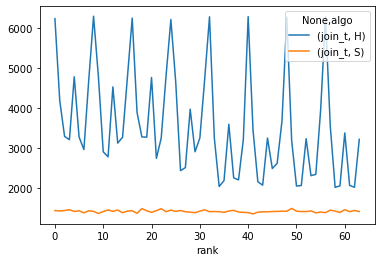

In [94]:
df1 = df.reset_index()
temp = df1[(df1.rows==1000000) & (df1.world==64) & (df1.type == 'R')].pivot_table(index=['rank'], columns=['algo'], values = ['join_t'])
# temp.to_csv('temp.txt')
temp.plot()

In [129]:
import numpy as np 

dd = df.reset_index()

df2  = dd[(dd['rank']==0)]
df2

tb1 = df2.pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['join_t'], aggfunc=np.mean)
tb2 = df2.pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['wait_t'], aggfunc=np.mean)
tb3 = df2.pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['total_t'], aggfunc=np.mean)
tb4 = df2.pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['lines'], aggfunc=np.sum)

tb = pd.concat((tb1, tb2,tb3, tb4), axis=1)
tb

join_t           wait_t           total_t           \
algo                       H        S       H       S         H        S   
type rows    world                                                         
I    125000  1         67.00    81.50    0.00    0.00     67.00    81.50   
             2         77.00    84.50    0.00    0.00     77.00    84.50   
             4         75.50    82.75    0.00    0.25     75.50    83.00   
             8         75.50    81.75    0.00    0.00     75.50    81.75   
             16        81.75    88.50    2.25    2.50     84.00    91.00   
...                      ...      ...     ...     ...       ...      ...   
R    2000000 16      4717.00  1547.25   13.00   29.25   4730.00  1576.50   
             32      8155.00  1749.25   71.00   40.00   8226.00  1789.25   
             64     16011.00  2210.00   60.25   28.00  16071.25  2238.00   
             128    31245.75  2868.00  227.50   92.25  31473.25  2960.25   
             160    40002.75  3213.25  172.25  128.00  40175.00  3341.25   

                        lines             
algo                        H          S  
type rows    world                        
I    125000  1       125813.0   125813.0  
             2       127376.0   127376.0  
             4       127120.0   127120.0  
             8       131264.0   131264.0  
             16      120064.0   120064.0  
...                       ...        ...  
R    2000000 16     3879472.0  3879472.0  
             32     3936128.0  3936128.0  
             64     4184512.0  4184512.0  
             128    3617408.0  3617408.0  
             160    3776320.0  3776320.0  

[180 rows x 8 columns]

In [130]:
tb.to_csv('dist_data.txt')

In [49]:
df_o = pd.DataFrame(data[0:48], columns=cols)
df_o.sort_values(by=['type','algo', 'rank'])

,rows,world,type,algo,rank,join_t,lines
9,100000,2,I,H,0,54,3138
25,100000,2,I,H,0,54,3138
41,100000,2,I,H,0,54,3138
8,100000,2,I,H,1,52,3135
24,100000,2,I,H,1,54,3135
40,100000,2,I,H,1,55,3135
11,100000,2,I,S,0,62,3138
26,100000,2,I,S,0,62,3138
43,100000,2,I,S,0,64,3138
10,100000,2,I,S,1,63,3135


In [25]:
l= "I0619 12:13:48.057111 69017 table_join_dist_test.cpp:49] 1 j_t 90 w_t 0 lines 100094 t 2 a1"
[int(k) for k in re.findall("\d+", l)]

[619, 12, 13, 48, 57111, 69017, 49, 1, 90, 0, 100094, 2, 1]

In [5]:
l= "I0619 00:00:12.160130 58265 table_join_dist_test.cpp:49] 1 join_ms 89 write_ms 0 produced 100250 type 2"
[int(k) for k in re.findall("\d+", l)]

[619, 0, 0, 12, 160130, 58265, 49, 1, 89, 0, 100250, 2]

# Weak scaling

In [308]:
import re 
import pandas as pd
import glob

# row_cases = [int(ii * 1000000) for ii in [0.125, 0.25, 0.5, 1, 2]] 
row_cases = [int(ii * 1000000) for ii in [1, 2]] 
world_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 160]
repetitions = 3

# types=['I', 'L', 'R', 'O'] # from the JC config enums 
types=['I'] # from the JC config enums 
algos=['S','H'] # JC enums 

# data_j = []
cols_j = ['framework', 'rows', 'world', 'type', 'algo', 'rank','join_t', 'wait_t', 'total_t', 'lines']

# data_u = []
cols_u = ['framework', 'rows', 'world', 'type', 'rank','union_t', 'wait_t', 'total_t', 'lines']

frameworks = ['twx', 'spark']

executables = {'table_join_dist_test': [],
               'table_union_dist_test': [],}
cols =  {
    'table_join_dist_test': ['framework', 'rows', 'world', 'type', 'algo', 'rank','join_t', 'wait_t', 'total_t', 'lines'],
    'table_union_dist_test': ['framework', 'rows', 'world', 'rank','union_t', 'wait_t', 'total_t', 'lines'],
}

def read_file(f):
    with open(f, 'r') as fp: 
        return fp.readlines()

for f in glob.glob('/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/weak/xx*'):
    if 'xx00' in f:  # first file
        lines = read_file(f)
        
        for l in lines:
            if '##### repetitions for each test' in l:
                s = [int(k) for k in re.findall("\d+", l)]
                reps = s[0]
                assert reps == repetitions
                break
    else:
        with open(f, 'r') as fp:
            fline = fp.readline()
            content = fp.read()
        
        s = re.split("/| ", fline)
        ex = s[0]
        rows = int(s[1])
        world = int(s[2])
        fw = s[4]
        it = int(s[5])
        assert int(s[6]) == reps
        print (ex, fw, rows, world, it) 
        
        if it == 1: 
            continue
        
        data = executables[ex]
        col = cols[ex]
        
        if fw == 'twx' and ex == 'table_join_dist_test':
            items=re.findall("table_join_dist_test.cpp:50.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                d = [fw, rows, world, types[s[5]], algos[s[6]], s[1], s[2], s[3], s[2] + s[3], s[4]]
                assert len(col) == len(d)
                data.append(d)
        
        if fw == 'spark' and ex == 'table_join_dist_test':
            items=re.findall("#### spark join time.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                assert world == s[-1]
                d = [fw, rows, world, 'I', 'MS', 0, s[0], 0, s[0], s[1]]
                assert len(col) == len(d)
                data.append(d)
        
        if fw == 'twx' and ex == 'table_union_dist_test':
            items=re.findall("table_union_dist_test.cpp:49.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                d = [fw, rows, world, s[1], s[2], s[3], s[2] + s[3], s[4]]
                assert len(col) == len(d)
                data.append(d)
        
        if fw == 'spark' and ex == 'table_union_dist_test':
            items=re.findall("#### spark union time.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                assert world == s[-1]
                d = [fw, rows, world, 0, s[0], 0, s[0], s[1]]
                assert len(col) == len(d)
                data.append(d)
            
 

table_join_dist_test twx 1000000 1 1
table_join_dist_test twx 1000000 1 2
table_join_dist_test twx 1000000 1 3
table_union_dist_test twx 1000000 1 1
table_union_dist_test twx 1000000 1 2
table_union_dist_test twx 1000000 1 3
table_join_dist_test spark 1000000 1 1
table_join_dist_test spark 1000000 1 2
table_join_dist_test spark 1000000 1 3
table_union_dist_test spark 1000000 1 1
table_union_dist_test spark 1000000 1 2
table_union_dist_test spark 1000000 1 3
table_join_dist_test twx 1000000 2 1
table_join_dist_test twx 1000000 2 2
table_join_dist_test twx 1000000 2 3
table_union_dist_test twx 1000000 2 1
table_union_dist_test twx 1000000 2 2
table_union_dist_test twx 1000000 2 3
table_join_dist_test spark 1000000 2 1
table_join_dist_test spark 1000000 2 2
table_join_dist_test spark 1000000 2 3
table_union_dist_test spark 1000000 2 1
table_union_dist_test spark 1000000 2 2
table_union_dist_test spark 1000000 2 3
table_join_dist_test twx 1000000 4 1
table_join_dist_test twx 1000000 4 2
ta

In [309]:
data = executables['table_join_dist_test']
col = cols['table_join_dist_test']
print(len(data))
print( len(row_cases)*sum(world_sizes)*(repetitions-1) * len(algos))
assert len(data) ==  len(row_cases)*sum(world_sizes)*(repetitions-1) * len(types) * len(algos) + len(row_cases)*len(world_sizes)*(repetitions-1)
join_df = pd.DataFrame(data, columns=col)


data = executables['table_union_dist_test']
col = cols['table_union_dist_test']
assert len(data) ==  len(row_cases)*sum(world_sizes)*(repetitions-1)  + len(row_cases)*len(world_sizes)*(repetitions-1) 
union_df = pd.DataFrame(data, columns=col)

3356
3320


## Join

In [310]:
join_df

,framework,rows,world,type,algo,rank,join_t,wait_t,total_t,lines
0,twx,1000000,1,I,H,0,300,0,300,1010238
1,twx,1000000,1,I,S,0,385,0,385,1010238
2,twx,1000000,1,I,H,0,297,0,297,1010238
3,twx,1000000,1,I,S,0,387,0,387,1010238
4,spark,1000000,1,I,MS,0,6005,0,6005,1010238
...,...,...,...,...,...,...,...,...,...,...
3351,twx,2000000,160,I,S,36,3376,69,3445,2022810
3352,twx,2000000,160,I,S,39,3445,0,3445,2022328
3353,twx,2000000,160,I,S,146,3396,49,3445,2018387
3354,spark,2000000,160,I,MS,0,22789,0,22789,323245442


In [311]:
out_dir = '/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/weak'
df = join_df.groupby(['framework','rows', 'world', 'type', 'algo', 'rank']).mean()  ## avg out reps 
df.to_csv(out_dir + '/test.csv')
df

join_t  wait_t  total_t       lines
framework rows    world type algo rank                                     
spark     1000000 1     I    MS   0     6349.5     0.0   6349.5   1010238.0
                  2     I    MS   0     4870.5     0.0   4870.5   2019429.0
                  4     I    MS   0     5351.5     0.0   5351.5   4040690.0
                  8     I    MS   0     6041.5     0.0   6041.5   8078310.0
                  16    I    MS   0     6367.0     0.0   6367.0  16155592.0
...                                        ...     ...      ...         ...
twx       2000000 160   I    S    155   3453.5    42.0   3495.5   2017675.0
                                  156   3437.0    59.0   3496.0   2024784.0
                                  157   3424.5    71.0   3495.5   2018091.0
                                  158   3449.5    45.0   3494.5   2022954.0
                                  159   3446.5    48.5   3495.0   2019774.0

[1678 rows x 4 columns]

In [312]:
df2 = df.reset_index()
df2 = df2[df2.framework == 'twx']
df2

,framework,rows,world,type,algo,rank,join_t,wait_t,total_t,lines
18,twx,1000000,1,I,H,0,298.5,0.0,298.5,1010238.0
19,twx,1000000,1,I,S,0,386.0,0.0,386.0,1010238.0
20,twx,1000000,2,I,H,0,745.5,0.0,745.5,1008602.0
21,twx,1000000,2,I,H,1,732.0,13.0,745.0,1010827.0
22,twx,1000000,2,I,S,0,757.0,2.0,759.0,1008602.0
...,...,...,...,...,...,...,...,...,...,...
1673,twx,2000000,160,I,S,155,3453.5,42.0,3495.5,2017675.0
1674,twx,2000000,160,I,S,156,3437.0,59.0,3496.0,2024784.0
1675,twx,2000000,160,I,S,157,3424.5,71.0,3495.5,2018091.0
1676,twx,2000000,160,I,S,158,3449.5,45.0,3494.5,2022954.0


In [313]:
import numpy as np 

tb1 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['join_t'], aggfunc=np.mean)
tb2 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['wait_t'], aggfunc=np.mean)
tb3 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['total_t'], aggfunc=np.mean)
tb4 = df2.pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['lines'], aggfunc=np.sum)

tb = pd.concat((tb1, tb2,tb3, tb4), axis=1)
tb.to_csv(out_dir + '/dist_data.csv')
tb

join_t         wait_t       total_t                lines  \
algo                     H       S      H     S       H       S            H   
type rows    world                                                             
I    1000000 1       298.5   386.0    0.0   0.0   298.5   386.0    1010238.0   
             2       745.5   757.0    0.0   2.0   745.5   759.0    2019429.0   
             4       784.5   768.0   11.5  25.5   796.0   793.5    4040690.0   
             8       809.5   776.5   39.0   9.5   848.5   786.0    8078310.0   
             16      833.5   787.5   35.0   9.0   868.5   796.5   16155592.0   
             32     1212.5   901.0   20.0  17.0  1232.5   918.0   32327192.0   
             64     1970.5  1363.5   43.5  22.5  2014.0  1386.0   64642992.0   
             128    4029.5  1669.0   64.0  24.5  4093.5  1693.5  129301234.0   
             160    5450.5  1795.5   79.5  76.5  5530.0  1872.0  161602775.0   
     2000000 1       810.5   875.5    0.0   0.0   810.5   875.5    2018386.0   
             2      1702.5  1615.0    4.5   4.0  1707.0  1619.0    4040462.0   
             4      1806.0  1623.5   25.0   1.5  1831.0  1625.0    8078958.0   
             8      1853.5  1639.0   32.0  46.0  1885.5  1685.0   16166014.0   
             16     1909.0  1651.5   59.0  57.5  1968.0  1709.0   32323077.0   
             32     2373.0  1971.5   20.5  13.5  2393.5  1985.0   64650515.0   
             64     3262.5  2431.5   38.5  21.0  3301.0  2452.5  129293987.0   
             128    5661.0  3100.5  101.0  20.5  5762.0  3121.0  258588122.0   
             160    7114.5  3451.5   59.5  43.5  7174.0  3495.0  323245442.0   

                                 
algo                          S  
type rows    world               
I    1000000 1        1010238.0  
             2        2019429.0  
             4        4040690.0  
             8        8078310.0  
             16      16155592.0  
             32      32327192.0  
             64      64642992.0  
             128    129301234.0  
             160    161602775.0  
     2000000 1        2018386.0  
             2        4040462.0  
             4        8078958.0  
             8       16166014.0  
             16      32323077.0  
             32      64650515.0  
             64     129293987.0  
             128    258588122.0  
             160    323245442.0

In [314]:
df2 = df.reset_index()
df2 = df2[df2.framework == 'spark']
df2.to_csv(out_dir + '/spart.csv')
df2

,framework,rows,world,type,algo,rank,join_t,wait_t,total_t,lines
0,spark,1000000,1,I,MS,0,6349.5,0.0,6349.5,1010238.0
1,spark,1000000,2,I,MS,0,4870.5,0.0,4870.5,2019429.0
2,spark,1000000,4,I,MS,0,5351.5,0.0,5351.5,4040690.0
3,spark,1000000,8,I,MS,0,6041.5,0.0,6041.5,8078310.0
4,spark,1000000,16,I,MS,0,6367.0,0.0,6367.0,16155592.0
5,spark,1000000,32,I,MS,0,7364.0,0.0,7364.0,32327192.0
6,spark,1000000,64,I,MS,0,11398.0,0.0,11398.0,64642992.0
7,spark,1000000,128,I,MS,0,13549.5,0.0,13549.5,129301234.0
8,spark,1000000,160,I,MS,0,15234.0,0.0,15234.0,161602775.0
9,spark,2000000,1,I,MS,0,7338.0,0.0,7338.0,2018386.0


## Union

In [315]:
union_df 

,framework,rows,world,rank,union_t,wait_t,total_t,lines
0,twx,1000000,1,0,1273,0,1273,2000000
1,twx,1000000,1,0,1289,0,1289,2000000
2,spark,1000000,1,0,5388,0,5388,2000000
3,spark,1000000,1,0,5400,0,5400,2000000
4,twx,1000000,2,0,1898,9,1907,1999371
...,...,...,...,...,...,...,...,...
1691,twx,2000000,160,29,9386,46,9432,4002729
1692,twx,2000000,160,128,9428,3,9431,4002123
1693,twx,2000000,160,135,9418,30,9448,3998889
1694,spark,2000000,160,0,23985,0,23985,639999997


In [316]:
df = union_df.groupby(['framework','rows', 'world', 'rank']).mean()  ## avg out reps 
# df.to_csv(out_dir + '/test.csv')
df

union_t  wait_t  total_t       lines
framework rows    world rank                                      
spark     1000000 1     0      5394.0     0.0   5394.0   2000000.0
                  2     0      4682.0     0.0   4682.0   4000000.0
                  4     0      5332.5     0.0   5332.5   8000000.0
                  8     0      7691.0     0.0   7691.0  16000000.0
                  16    0      7656.0     0.0   7656.0  32000000.0
...                               ...     ...      ...         ...
twx       2000000 160   155    9382.0    32.0   9414.0   4001396.0
                        156    9347.5    62.0   9409.5   3995920.0
                        157    9322.5    98.0   9420.5   3998889.0
                        158    9317.0   107.5   9424.5   3999666.0
                        159    9357.5    67.0   9424.5   3999383.0

[848 rows x 4 columns]

In [317]:
df2 = df.reset_index()
df2 = df2[df2['framework'] == 'twx']

tb1 = df2[df2['rank'] == 0].drop(['lines'], axis=1)
tb2 = df2.groupby(['rows', 'world']).agg({'lines': 'sum'})

tb = pd.merge(tb1, tb2, on = ['rows', 'world'], how= 'outer', validate = 'one_to_one')
tb.to_csv(out_dir + '/dist_union_twx.csv')
tb

,framework,rows,world,rank,union_t,wait_t,total_t,lines
0,twx,1000000,1,0,1281.0,0.0,1281.0,2000000.0
1,twx,1000000,2,0,1890.5,6.5,1897.0,4000000.0
2,twx,1000000,4,0,1925.5,9.0,1934.5,8000000.0
3,twx,1000000,8,0,1921.5,26.0,1947.5,16000000.0
4,twx,1000000,16,0,1968.0,18.5,1986.5,32000000.0
5,twx,1000000,32,0,2345.0,23.0,2368.0,64000000.0
6,twx,1000000,64,0,3054.0,107.0,3161.0,127999999.0
7,twx,1000000,128,0,5193.5,87.0,5280.5,256000000.0
8,twx,1000000,160,0,6591.5,51.5,6643.0,319999999.0
9,twx,2000000,1,0,2627.5,0.0,2627.5,4000000.0


In [319]:
df2 = df.reset_index()
df2 = df2[df2['framework'] == 'spark']

df2

,framework,rows,world,rank,union_t,wait_t,total_t,lines
0,spark,1000000,1,0,5394.0,0.0,5394.0,2000000.0
1,spark,1000000,2,0,4682.0,0.0,4682.0,4000000.0
2,spark,1000000,4,0,5332.5,0.0,5332.5,8000000.0
3,spark,1000000,8,0,7691.0,0.0,7691.0,16000000.0
4,spark,1000000,16,0,7656.0,0.0,7656.0,32000000.0
5,spark,1000000,32,0,8755.0,0.0,8755.0,64000000.0
6,spark,1000000,64,0,12260.0,0.0,12260.0,127999999.0
7,spark,1000000,128,0,13978.0,0.0,13978.0,256000000.0
8,spark,1000000,160,0,14923.0,0.0,14923.0,319999999.0
9,spark,2000000,1,0,6746.5,0.0,6746.5,4000000.0


# Strong scaling

In [326]:
import re 
import pandas as pd
import glob

row_cases = [int(ii * 1000000) for ii in [200]] 
world_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 160]
repetitions = 2

types=['I', ] # from the JC config enums 
algos=['S','H'] # JC enums 

frameworks = ['twx', 'spark']

executables = {'table_join_dist_test': [],
               'table_union_dist_test': [],}
cols =  {
    'table_join_dist_test': ['framework', 'rows', 'world', 'type', 'algo', 'rank','join_t', 'wait_t', 'total_t', 'lines'],
    'table_union_dist_test': ['framework', 'rows', 'world', 'rank','union_t', 'wait_t', 'total_t', 'lines'],
}

def read_file(f):
    with open(f, 'r') as fp: 
        return fp.readlines()

for f in glob.glob('/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/strong/xx*'):
    if 'xx00' in f:  # first file
        lines = read_file(f)
        
        for l in lines:
            if '##### repetitions for each test' in l:
                s = [int(k) for k in re.findall("\d+", l)]
                reps = s[0]
                assert reps == repetitions
                break
    else:
        with open(f, 'r') as fp:
            fline = fp.readline()
            content = fp.read()
        
        s = re.split("/| ", fline)
        ex = s[0]
        rows = int(s[1])
        world = int(s[2])
        fw = s[4]
        it = int(s[5])
        assert int(s[6]) == reps
        print (ex, fw, rows, world, it) 
        
        if it == 1: 
            continue
        
        data = executables[ex]
        col = cols[ex]
        
        if fw == 'twx' and ex == 'table_join_dist_test':
            items=re.findall("table_join_dist_test.cpp:50.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                d = [fw, rows, world, types[s[5]], algos[s[6]], s[1], s[2], s[3], s[2] + s[3], s[4]]
                assert len(col) == len(d)
                data.append(d)
        
        if fw == 'spark' and ex == 'table_join_dist_test':
            items=re.findall("#### spark join time.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                assert world == s[-1]
                d = [fw, rows, world, 'I', 'MS', 0, s[0], 0, s[0], s[1]]
                assert len(col) == len(d)
                data.append(d)
        
        if fw == 'twx' and ex == 'table_union_dist_test':
            items=re.findall("table_union_dist_test.cpp:49.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                d = [fw, rows, world, s[1], s[2], s[3], s[2] + s[3], s[4]]
                assert len(col) == len(d)
                data.append(d)
        
        if fw == 'spark' and ex == 'table_union_dist_test':
            items=re.findall("#### spark union time.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                assert world == s[-1]
                d = [fw, rows, world, 0, s[0], 0, s[0], s[1]]
                assert len(col) == len(d)
                data.append(d)

table_join_dist_test twx 200000000 1 1
table_join_dist_test twx 200000000 1 2
table_union_dist_test twx 200000000 1 1
table_union_dist_test twx 200000000 1 2
table_join_dist_test spark 200000000 1 1
table_join_dist_test spark 200000000 1 2
table_union_dist_test spark 200000000 1 1
table_union_dist_test spark 200000000 1 2
table_join_dist_test twx 200000000 2 1
table_join_dist_test twx 200000000 2 2
table_union_dist_test twx 200000000 2 1
table_union_dist_test twx 200000000 2 2
table_join_dist_test spark 200000000 2 1
table_join_dist_test spark 200000000 2 2
table_union_dist_test spark 200000000 2 1
table_union_dist_test spark 200000000 2 2
table_join_dist_test twx 200000000 4 1
table_join_dist_test twx 200000000 4 2
table_union_dist_test twx 200000000 4 1
table_union_dist_test twx 200000000 4 2
table_join_dist_test spark 200000000 4 1
table_join_dist_test spark 200000000 4 2
table_union_dist_test spark 200000000 4 1
table_union_dist_test spark 200000000 4 2
table_join_dist_test twx 200

In [351]:
row_cases = [int(ii * 1000000) for ii in [200]] 
world_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 160]
repetitions = 1

types=['I', ] # from the JC config enums 
algos=['S','H'] # JC enums 

frameworks = ['twx',]

executables = {'table_join_dist_test': [],
               }
cols =  {
    'table_join_dist_test': ['framework', 'rows', 'world', 'type', 'algo', 'rank','join_t', 'wait_t', 'total_t', 'lines'],
#     'table_union_dist_test': ['framework', 'rows', 'world', 'rank','union_t', 'wait_t', 'total_t', 'lines'],
}

def read_file(f):
    with open(f, 'r') as fp: 
        return fp.readlines()

for f in glob.glob('/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/strong1/xx*'):
    if 'xx00' in f:  # first file
        lines = read_file(f)
        
        for l in lines:
            if '##### repetitions for each test' in l:
                s = [int(k) for k in re.findall("\d+", l)]
                reps = s[0]
                assert reps == repetitions
                break
    else:
        with open(f, 'r') as fp:
            fline = fp.readline()
            content = fp.read()
        
        s = re.split("/| ", fline)
        ex = s[0]
        rows = int(s[1])
        world = int(s[2])
        fw = s[4]
        it = int(s[5])
        assert int(s[6]) == reps
        print (ex, fw, rows, world, it) 
        
        
        data = executables[ex]
        col = cols[ex]
        
        if fw == 'twx' and ex == 'table_join_dist_test':
            items=re.findall("table_join_dist_test.cpp:51.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                d = [fw, rows, world, types[s[5]], algos[s[6]], s[1], s[2], s[3], s[2] + s[3], s[4]]
                assert len(col) == len(d)
                data.append(d)
        

data = executables['table_join_dist_test']
col = cols['table_join_dist_test']
print(len(data))
print(len(row_cases)*sum(world_sizes)*repetitions * len(types) * len(algos) )
assert len(data) ==  len(row_cases)*sum(world_sizes)*repetitions * len(types) * len(algos) 
join_df = pd.DataFrame(data, columns=col)
join_df 

out_dir = '/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/strong1/'
df = join_df.groupby(['framework','rows', 'world', 'type', 'algo', 'rank']).mean()  ## avg out reps 
df.to_csv(out_dir + '/test.csv')
df

df2 = df.reset_index()
df2 = df2[df2.framework == 'twx']
df2

tb1 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['join_t'], aggfunc=np.mean)
tb2 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['wait_t'], aggfunc=np.mean)
tb3 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['total_t'], aggfunc=np.mean)
tb4 = df2.pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['lines'], aggfunc=np.sum)

tb = pd.concat((tb1, tb2,tb3, tb4), axis=1)
tb.to_csv(out_dir + '/dist_data.csv')
tb

table_join_dist_test twx 200000000 160 1
table_join_dist_test twx 200000000 128 1
table_join_dist_test twx 200000000 64 1
table_join_dist_test twx 200000000 32 1
table_join_dist_test twx 200000000 1 1
table_join_dist_test twx 200000000 2 1
table_join_dist_test twx 200000000 4 1
table_join_dist_test twx 200000000 8 1
table_join_dist_test twx 200000000 16 1
830
830


join_t         wait_t      total_t              lines  \
algo                       H       S      H    S       H       S          H   
type rows      world                                                          
I    200000000 1      141482  162606      0    0  141482  162606  202036951   
               2      121203  115905      0    0  121203  115905  202039506   
               4       61602   56834      0  432   61602   57266  202062332   
               8       30699   27239     36   91   30735   27330  201988601   
               16      14903   13169     81  222   14984   13391  202013961   
               32       8042    7053     39   33    8081    7086  202020497   
               64       4488    4516     31    0    4519    4516  202021648   
               128      2776    4757     34   43    2810    4800  201996495   
               160      2404    5621     54   39    2458    5660  202025757   

                                 
algo                          S  
type rows      world             
I    200000000 1      202036951  
               2      202039506  
               4      202062332  
               8      201988601  
               16     202013961  
               32     202020497  
               64     202021648  
               128    201996495  
               160    202025757

## Join

In [334]:
repetitions = repetitions -1 
data = executables['table_join_dist_test']
col = cols['table_join_dist_test']
assert len(data) ==  len(row_cases)*sum(world_sizes)*repetitions * len(types) * len(algos) + len(row_cases)*len(world_sizes)*repetitions
join_df = pd.DataFrame(data, columns=col)


data = executables['table_union_dist_test']
col = cols['table_union_dist_test']
assert len(data) ==  len(row_cases)*sum(world_sizes)*repetitions  + len(row_cases)*len(world_sizes)*repetitions 
union_df = pd.DataFrame(data, columns=col)

AssertionError: 

In [328]:
out_dir = '/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/strong/'
df = join_df.groupby(['framework','rows', 'world', 'type', 'algo', 'rank']).mean()  ## avg out reps 
df.to_csv(out_dir + '/test.csv')
df

df2 = df.reset_index()
df2 = df2[df2.framework == 'twx']
df2

tb1 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['join_t'], aggfunc=np.mean)
tb2 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['wait_t'], aggfunc=np.mean)
tb3 = df2[df2['rank'] == 0].pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['total_t'], aggfunc=np.mean)
tb4 = df2.pivot_table(index= ['type','rows', 'world'], columns = ['algo'], values = ['lines'], aggfunc=np.sum)

tb = pd.concat((tb1, tb2,tb3, tb4), axis=1)
tb.to_csv(out_dir + '/dist_data.csv')
tb

join_t         wait_t      total_t              lines  \
algo                       H       S      H    S       H       S          H   
type rows      world                                                          
I    200000000 1      141913  164242      0    0  141913  164242  202013930   
               2      118439  116225      0    0  118439  116225  201999187   
               4       60823   55759    552  723   61375   56482  201986323   
               8       30804   27140    195  270   30999   27410  202054944   
               16      15219   13093    115  154   15334   13247  202031996   
               32       8297    6983      0   47    8297    7030  202022378   
               64       4969    3966     72   17    5041    3983  202009042   
               128      4971    2422     81   93    5052    2515  202025973   
               160      5908    2208     31   90    5939    2298  202011107   

                                 
algo                          S  
type rows      world             
I    200000000 1      202013930  
               2      201999187  
               4      201986323  
               8      202054944  
               16     202031996  
               32     202022378  
               64     202009042  
               128    202025973  
               160    202011107

In [329]:
df2 = df.reset_index()
df2 = df2[df2.framework == 'spark']
df2.to_csv(out_dir + '/spart.csv')
df2

,framework,rows,world,type,algo,rank,join_t,wait_t,total_t,lines
0,spark,200000000,1,I,MS,0,586519,0,586519,202013930
1,spark,200000000,2,I,MS,0,332779,0,332779,201999187
2,spark,200000000,4,I,MS,0,207083,0,207083,201986323
3,spark,200000000,8,I,MS,0,119032,0,119032,202054944
4,spark,200000000,16,I,MS,0,62295,0,62295,202031996
5,spark,200000000,32,I,MS,0,39590,0,39590,202022378
6,spark,200000000,64,I,MS,0,22167,0,22167,202009042
7,spark,200000000,128,I,MS,0,18127,0,18127,202025973
8,spark,200000000,160,I,MS,0,17986,0,17986,202011107


## Union

In [331]:
df = union_df.groupby(['framework','rows', 'world', 'rank']).mean()  ## avg out reps 
# df.to_csv(out_dir + '/test.csv')
df

df2 = df.reset_index()
df2 = df2[df2['framework'] == 'twx']

tb1 = df2[df2['rank'] == 0].drop(['lines'], axis=1)
tb2 = df2.groupby(['rows', 'world']).agg({'lines': 'sum'})

tb = pd.merge(tb1, tb2, on = ['rows', 'world'], how= 'outer', validate = 'one_to_one')
tb.to_csv(out_dir + '/dist_union_twx.csv')
tb

,framework,rows,world,rank,union_t,wait_t,total_t,lines
0,twx,200000000,1,0,342537,0,342537,400000000
1,twx,200000000,2,0,223186,933,224119,400000000
2,twx,200000000,4,0,108530,1553,110083,400000000
3,twx,200000000,8,0,53022,0,53022,399999999
4,twx,200000000,16,0,26676,242,26918,400000000
5,twx,200000000,32,0,14064,40,14104,400000000
6,twx,200000000,64,0,8399,88,8487,400000000
7,twx,200000000,128,0,6773,60,6833,400000000
8,twx,200000000,160,0,7261,5,7266,400000000


In [330]:
df2 = df.reset_index()
df2 = df2[df2['framework'] == 'spark']

df2

,framework,rows,world,rank,union_t,wait_t,total_t,lines
0,spark,200000000,1,0,748567,0,748567,400000000
1,spark,200000000,2,0,412414,0,412414,400000000
2,spark,200000000,4,0,239747,0,239747,400000000
3,spark,200000000,8,0,141440,0,141440,399999999
4,spark,200000000,16,0,69525,0,69525,400000000
5,spark,200000000,32,0,43651,0,43651,400000000
6,spark,200000000,64,0,23895,0,23895,400000000
7,spark,200000000,128,0,18384,0,18384,400000000
8,spark,200000000,160,0,17572,0,17572,400000000


# Dask 

In [358]:
path = "/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/dask2.log"

with open(path, 'r') as fp:
    lines = fp.readlines()

data = []
for l in lines:
    if not "###time " in l:
        continue
        
    s = l.split(' ')
    r = int(s[1])
    w = int(s[2])
    it = int(s[3])
    t = int(s[4].replace(',', ''))
    l = int(s[5])
    
    if it != 0:
        data.append(['dask', r, w, t, l])

cols = ['framework', 'rows', 'world', 'total_t', 'lines']

join_df = pd.DataFrame(data, columns=cols)
join_df 
df = join_df.groupby(['framework', 'rows', 'world']).mean()
df

total_t        lines
framework rows      world                            
dask      200000000 4      246742.666667  202023666.0
                    8      134620.333333  202035870.0
                    16     134154.333333  202021422.0
                    32     113095.000000  202000681.0
                    64     109013.666667  202029826.0
                    128     70640.333333  202002021.0
                    160     68854.000000  202000322.0

# PyTwx

In [383]:
row_cases = [int(ii * 1000000) for ii in [200]] 
world_sizes = [16, 32, 64, 128]
repetitions = 4

types=['I', ] # from the JC config enums 
algos=['S','H'] # JC enums 

frameworks = ['twx',]

executables = {
    'table_join_dist_test': [],
    }
cols =  {
    'table_join_dist_test': ['framework', 'rows', 'world', 'type', 'algo', 'rank', 'total_t', 'lines'],
#     'table_union_dist_test': ['framework', 'rows', 'world', 'rank','union_t', 'wait_t', 'total_t', 'lines'],
}

def read_file(f):
    with open(f, 'r') as fp: 
        return fp.readlines()

for f in glob.glob('/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/pytwx/xx*'):
    if 'xx00' in f:  # first file
        lines = read_file(f)
        
        for l in lines:
            if '##### repetitions for each test' in l:
                s = [int(k) for k in re.findall("\d+", l)]
                reps = s[0]
                assert reps == repetitions
                break
    else:
        with open(f, 'r') as fp:
            fline = fp.readline()
            content = fp.read()
        
        s = re.split("/| ", fline)
        ex = s[0]
        rows = int(s[1])
        world = int(s[2])
        fw = s[4]
        it = int(s[5])
        assert int(s[6]) == reps
#         print (ex, fw, rows, world, it) 
        if it == 1: 
            continue
        
        data = executables[ex]
        col = cols[ex]
        
        if fw == 'twx' and ex == 'table_join_dist_test':
            items=re.findall("table_join_dist_test.cpp:51.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                d = [fw, rows, world, types[s[5]], algos[s[6]], s[1], s[2] + s[3], s[4]]
                assert len(col) == len(d)
                data.append(d)

        if fw == 'ptwx' and ex == 'table_join_dist_test':
            items=re.findall("####time.*$",content, re.MULTILINE)
            for l in items:
                s = l.split(' ')
                algo = 'H' if s[14] == 'hash' else 'S'
                d = [fw, rows, world, 'I', algo, int(s[2]), int(float(s[8])*1000), int(s[10])]
                assert len(col) == len(d)
                data.append(d)

                
        if fw == 'jtwx' and ex == 'table_join_dist_test':
            items=re.findall("TOKEN.*$",content, re.MULTILINE)
            for l in items:
                s = [int(k) for k in re.findall("\d+", l)]
                d = [fw, rows, world, 'I', algos[s[-1]], s[0], s[1], s[3]]
                assert len(col) == len(d)
                data.append(d)                

data = executables['table_join_dist_test']
col = cols['table_join_dist_test']
repetitions = repetitions -1 
print(len(data))
print(len(row_cases)*sum(world_sizes)*repetitions * len(types) * len(algos) )
assert len(data) ==  len(row_cases)*sum(world_sizes)*repetitions * len(types) * len(algos) * 3
join_df = pd.DataFrame(data, columns=col)
join_df 

4320
1440


,framework,rows,world,type,algo,rank,total_t,lines
0,twx,200000000,16,I,H,10,23139,12632623
1,twx,200000000,16,I,H,0,23138,12624467
2,twx,200000000,16,I,H,7,23138,12629189
3,twx,200000000,16,I,H,9,23139,12631573
4,twx,200000000,16,I,H,2,23138,12631977
...,...,...,...,...,...,...,...,...
4315,jtwx,200000000,128,I,S,99,3198,1575697
4316,jtwx,200000000,128,I,S,59,3200,1575231
4317,jtwx,200000000,128,I,S,19,3198,1576001
4318,jtwx,200000000,128,I,S,29,3199,1581132


In [384]:
out_dir = '/N/u2/d/dnperera/victor/git/twisterx/cpp/src/experiments/pytwx/'
df = join_df.groupby(['framework','rows', 'world', 'type', 'algo', 'rank']).mean()  ## avg out reps 
df.to_csv(out_dir + '/test.csv')
df

df2 = df.reset_index()
df2

tb3 = df2[df2['rank'] == 0].pivot_table(index= ['framework','type','rows', 'world'], columns = ['algo'], values = ['total_t'], aggfunc=np.mean)
tb4 = df2.pivot_table(index= ['framework','type','rows', 'world'], columns = ['algo'], values = ['lines'], aggfunc=np.sum)

tb = pd.concat((tb3, tb4), axis=1)
tb.to_csv(out_dir + '/dist_data.csv')
tb

total_t                      lines  \
algo                                       H             S            H   
framework type rows      world                                            
jtwx      I    200000000 16     24360.666667  20963.333333  202044697.0   
                         32     12206.000000  10654.000000  202000681.0   
                         64      6782.000000   5462.333333  202029826.0   
                         128     5985.333333   3139.666667  202002021.0   
ptwx      I    200000000 16     24087.000000  19615.666667  202044697.0   
                         32     12108.333333  10072.000000  202000681.0   
                         64      6601.000000   5310.333333  202029826.0   
                         128     6056.333333   3106.666667  202002021.0   
twx       I    200000000 16     23122.333333  19665.333333  202044697.0   
                         32     11795.666667  10198.000000  202000681.0   
                         64      6594.000000   5241.000000  202029826.0   
                         128     5865.333333   3108.333333  202002021.0   

                                             
algo                                      S  
framework type rows      world               
jtwx      I    200000000 16     202044697.0  
                         32     202000681.0  
                         64     202029826.0  
                         128    202002021.0  
ptwx      I    200000000 16     202044697.0  
                         32     202000681.0  
                         64     202029826.0  
                         128    202002021.0  
twx       I    200000000 16     202044697.0  
                         32     202000681.0  
                         64     202029826.0  
                         128    202002021.0